In [ ]:
#check gpu running
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

print("cwd ", os.getcwd())
print("ls ", os.listdir())

cwd  /content
ls  ['.config', 'gdrive', 'sample_data']


In [ ]:
path="/content/gdrive/My Drive/"
print("ls ", os.listdir(path))

ls  ['Adsız doküman.gdoc', 'Survey for Comparison of Software Process Models.gform', 'Survey for Comparison of Software Process Models (Yanıtlar).gsheet', 'Yeni Microsoft Word Document.gdoc', 'Colab Notebooks', 'kaan.csv', 'classification_word2vec_3.ipynb', 'idefix.csv', 'all.csv', 'review3.csv', 'haydi_gokhan.csv', 'denemeee.txt', 'tfmrs_model.pkl', 'G17_Person.rar', 'denedik.h5', 'tokenizer.pickle', 'trtc.rar', 'SE494_Senior_Project_Video.mp4', 'Gökhan_Soyalp_PersonTaskApp.apk', 'Gökhan_Soyalp_CV.pdf', 'engin', 'model', '200_egitim.txt', 'ICModel.h5']


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
img_width, img_height = 180,180
train_data_dir = path + 'engin/dataset/training'
val_data_dir = path + 'engin/dataset/testing'
batch_size = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 2 classes.
Using 800 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 200 files belonging to 2 classes.
Using 40 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Enfekteli', 'Temiz']


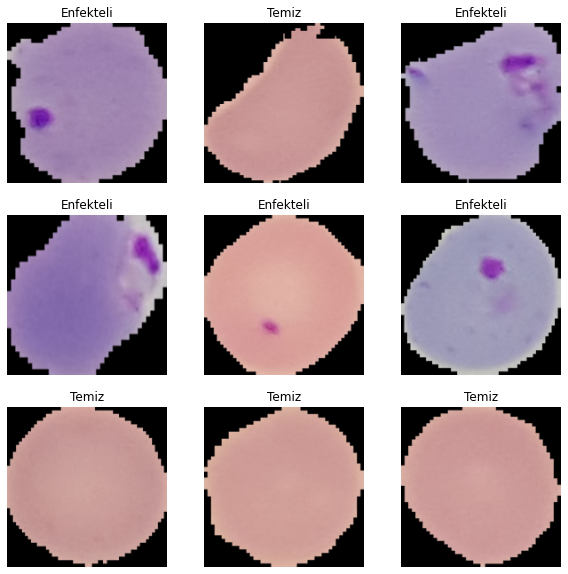

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.83401966


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
25/25 [==============================] - 16s 234ms/step - loss: 0.5149 - accuracy: 0.7962 - val_loss: 0.9044 - val_accuracy: 0.7250
Epoch 2/10
25/25 [==============================] - 3s 91ms/step - loss: 0.2123 - accuracy: 0.9400 - val_loss: 0.9005 - val_accuracy: 0.7250
Epoch 3/10
25/25 [==============================] - 3s 86ms/step - loss: 0.2002 - accuracy: 0.9413 - val_loss: 1.0446 - val_accuracy: 0.7250
Epoch 4/10
25/25 [==============================] - 3s 87ms/step - loss: 0.1905 - accuracy: 0.9425 - val_loss: 0.4778 - val_accuracy: 0.7500
Epoch 5/10
25/25 [==============================] - 3s 86ms/step - loss: 0.1890 - accuracy: 0.9413 - val_loss: 0.5888 - val_accuracy: 0.7250
Epoch 6/10
25/25 [==============================] - 3s 85ms/step - loss: 0.1681 - accuracy: 0.9438 - val_loss: 0.4777 - val_accuracy: 0.7500
Epoch 7/10
25/25 [==============================] - 3s 87ms/step - loss: 0.1504 - accuracy: 0.9488 - val_loss: 0.5167 - val_accuracy: 0.7500
Epoch 8/10


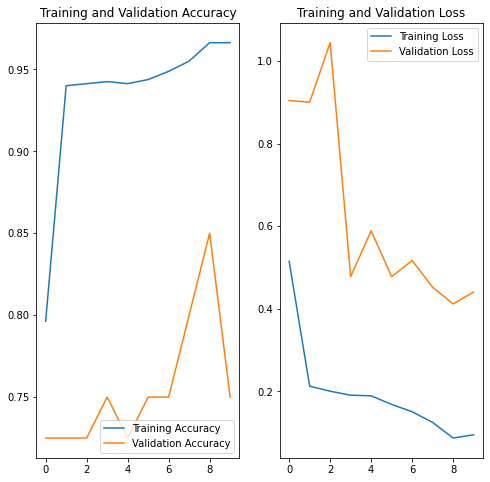

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print('Test accuracy :', accuracy)

2/2 [==============================] - 0s 14ms/step - loss: 0.4404 - accuracy: 0.7500
Test accuracy : 0.75


In [ ]:
model.save(path+'ICModel.h5')

Predictions:
 [0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0
 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Labels:
 [1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0]


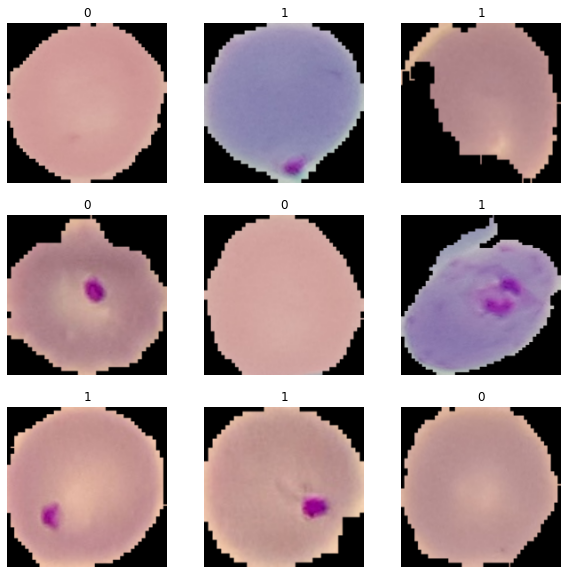

In [ ]:
image_batch, label_batch = val_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")


In [ ]:


img = tf.keras.utils.load_img(path + "dataset/asss.png", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

FileNotFoundError: ignored